In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [3, 4]
plt.rcParams["figure.autolayout"] = True
plt.rcParams['svg.fonttype'] = 'none'
ROOT = "/Users/yuan/Dropbox (Personal)/Personal Work/_Projects2023/01_city-never-was"
result = pd.read_csv("/Users/yuan/Dropbox (Personal)/Personal Work/_Projects2023/01_city-never-was/_table/road_fatality_built_env_sprawl.csv")[0:35]
GRAPHIC_PATH = f"{ROOT}/_graphic/cluster_figure"
result.head()

,Unnamed: 0,seg00,Unnamed: 2,seg2,Unnamed: 4,seg1,Unnamed: 6,seg0,Unnamed: 8,seg12,...,seg00b,Unnamed: 12,seg2b,Unnamed: 14,seg1b,Unnamed: 16,seg0b,Unnamed: 18,seg12b,Unnamed: 20
0,NaN,b,t,b,t,b,t,b,t,b,...,b,t,b,t,b,t,b,t,b,t
1,logpop,-.1229783,-1.12966,-.1879277,-1.588819,NaN,NaN,-.0550636,-.480478,-.104147,...,-.1145215,-1.100173,-.2321082,-1.899711,NaN,NaN,-.1575885,-1.406722,-.2651334,-2.323544
2,logflux,-.041764,-.3782267,.0174802,.1548594,NaN,NaN,-.0450137,-.4028663,.0148897,...,-.1167738,-1.069259,.0125469,.11685,NaN,NaN,-.0850759,-.7534534,.0272451,.2748819
3,loggdp,-.4268007,-2.870959,-.7533452,-5.543964,NaN,NaN,-.2919988,-1.859268,-.657157,...,-.3812862,-2.573731,-.7988678,-5.181528,NaN,NaN,-.3755807,-2.943307,-.7021055,-5.344409
4,cluster_4,NaN,NaN,2.587475,3.215288,NaN,NaN,NaN,NaN,3.76581,...,NaN,NaN,2.489042,3.075221,NaN,NaN,NaN,NaN,2.170315,2.763609


In [2]:
columnmap = {
    'seg00':'control',
    'seg2':'svf+control',
    'seg1':'sprawl_road_density',
    'seg0':'sprawl_road_density+control',
    'seg12':'svf+sprawl_road_density+control',
    'seg00b':'control2', # with spwral index available
    'seg2b':'svf_2+control2', # with spwral index available
    'seg1b':'sprawl_index', # with spwral index available
    'seg0b':'sprawl_index+control2', # with spwral index available
    'seg12b':'svf_2+sprawl_index+control2', # with spwral index available
}
color_schema = {
    "sprawl_road_density+control":"#ddb27c", # brown

    "svf+control":"#223f9a", # dark blue

    "svf+sprawl_road_density+control":"#12939a", # dark green
    
    "sprawl_index+control2":"#ddb27c", # brown

    "svf_2+control2":"#223f9a", # dark blue

    "svf_2+sprawl_index+control2":"#12939a", # dark green
                }

In [3]:
result = result[['seg00','seg2','seg0','seg12','seg00b','seg2b','seg0b','seg12b']][-1:].rename(columns=columnmap).astype(float).reset_index(drop = True)
result

,control,svf+control,sprawl_road_density+control,svf+sprawl_road_density+control,control2,svf_2+control2,sprawl_index+control2,svf_2+sprawl_index+control2
0,0.3784,0.54729,0.409443,0.616751,0.426123,0.6035,0.511258,0.697447


In [4]:
result_plot = result[['svf+control', 'sprawl_road_density+control',
       'svf+sprawl_road_density+control', 'svf_2+control2',
       'sprawl_index+control2', 'svf_2+sprawl_index+control2']]

In [5]:
result_base = result_plot.copy()
control1 = result.loc[0,'control']
control2 = result.loc[0,'control2']
for col in result_plot.columns:
    if "control2" in col:
        result_base[col] = control2
    else:
        result_base[col] = control1
result_base

,svf+control,sprawl_road_density+control,svf+sprawl_road_density+control,svf_2+control2,sprawl_index+control2,svf_2+sprawl_index+control2
0,0.3784,0.3784,0.3784,0.426123,0.426123,0.426123


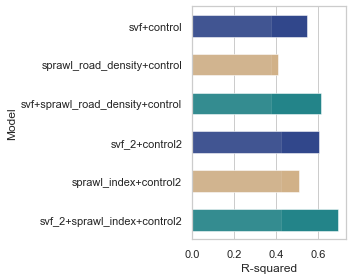

In [6]:
# create a horizontal bar plot 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(5, 4))
gap = 0.3
sns.barplot(data=result_plot, 
            ax=ax, 
            orient='h', 
            palette=[color_schema[col] for col in result_plot.columns],
            linewidth=0.5,
            gap = gap
            )
sns.barplot(data = result_base, 
            ax=ax, orient='h', 
            color = 'lightgrey',
            gap = gap,
            alpha = 0.1)
ax.set_xlabel('R-squared')
ax.set_ylabel('Model')
# save the fig
fig.savefig(f"{GRAPHIC_PATH}/cluster_figure.svg", format='svg', dpi=300)